1. Loading the Dataset:




Download the Twitter Entity Sentiment Analysis dataset from Kaggle and save it to your working directory.

2. Import Libraries and Load Data:



In [1]:
import pandas as pd

# Load the training dataset
train_file_path = 'twitter_training.csv'
train_data = pd.read_csv(train_file_path)

# Load the validation dataset
validation_file_path = 'twitter_validation.csv'
validation_data = pd.read_csv(validation_file_path)

# Display first few rows of training data
train_data.head()

# Display first few rows of validation data
validation_data.head()


,3364,Facebook,Irrelevant,"I mentioned on Facebook that I was struggling for motivation to go for a run the other day, which has been translated by Tom’s great auntie as ‘Hayley can’t get out of bed’ and told to his grandma, who now thinks I’m a lazy, terrible person 🤣"
0,352,Amazon,Neutral,BBC News - Amazon boss Jeff Bezos rejects clai...
1,8312,Microsoft,Negative,@Microsoft Why do I pay for WORD when it funct...
2,4371,CS-GO,Negative,"CSGO matchmaking is so full of closet hacking,..."
3,4433,Google,Neutral,Now the President is slapping Americans in the...
4,6273,FIFA,Negative,Hi @EAHelp I’ve had Madeleine McCann in my cel...


Text Preprocessing:

In [2]:
import nltk
nltk.download('stopwords')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\ganes\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [6]:
# Convert NaN values to empty strings
train_data['clean_text'].fillna('', inplace=True)

# Convert all values to strings
train_data['clean_text'] = train_data['clean_text'].astype(str)

# Apply sentiment analysis to the cleaned text
train_data['sentiment_score'] = train_data['clean_text'].apply(lambda x: sia.polarity_scores(x)['compound'])



In [7]:
# Import necessary libraries
import pandas as pd
from nltk.sentiment import SentimentIntensityAnalyzer

# Load your training data without header and specify column names
columns = ['ID', 'Topic', 'Sentiment', 'Text']
train_data = pd.read_csv('twitter_training.csv', header=None, names=columns)

# Fill NaN values with empty strings and convert all values to strings
train_data['Text'].fillna('', inplace=True)
train_data['Text'] = train_data['Text'].astype(str)

# Apply sentiment analysis
sia = SentimentIntensityAnalyzer()
train_data['sentiment_score'] = train_data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])

# Displaying the processed data with sentiment scores
print(train_data[['Text', 'sentiment_score']])


                                                    Text  sentiment_score
0      im getting on borderlands and i will murder yo...          -0.6908
1      I am coming to the borders and I will kill you...          -0.6908
2      im getting on borderlands and i will kill you ...          -0.6908
3      im coming on borderlands and i will murder you...          -0.6908
4      im getting on borderlands 2 and i will murder ...          -0.6908
...                                                  ...              ...
74677  Just realized that the Windows partition of my...           0.0772
74678  Just realized that my Mac window partition is ...          -0.2960
74679  Just realized the windows partition of my Mac ...          -0.2960
74680  Just realized between the windows partition of...           0.0772
74681  Just like the windows partition of my Mac is l...           0.3687

[74682 rows x 2 columns]


In [17]:
# Save the processed data to a new CSV file
train_data.to_csv('sentiment_scores.csv', index=False)


In [19]:
# Load your training data without header and specify column names
columns = ['ID', 'Topic', 'Sentiment', 'Text']
train_data = pd.read_csv('twitter_training.csv', header=None, names=columns)

# Fill NaN values with empty strings and convert all values to strings
train_data['Text'].fillna('', inplace=True)
train_data['Text'] = train_data['Text'].astype(str)

# Apply sentiment analysis
sia = SentimentIntensityAnalyzer()
train_data['sentiment_score'] = train_data['Text'].apply(lambda x: sia.polarity_scores(x)['compound'])


In [20]:
print(train_data.columns)


Index(['ID', 'Topic', 'Sentiment', 'Text', 'sentiment_score'], dtype='object')


In [21]:
print(train_data['sentiment_score'].head())


0   -0.6908
1   -0.6908
2   -0.6908
3   -0.6908
4   -0.6908
Name: sentiment_score, dtype: float64


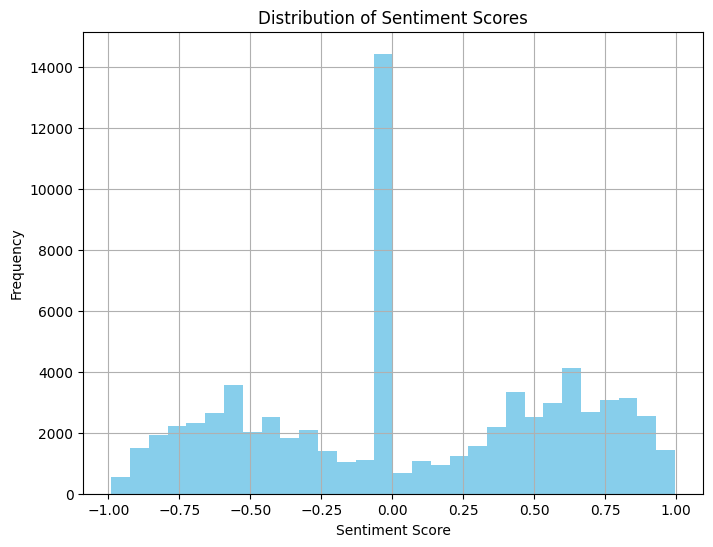

In [22]:
import matplotlib.pyplot as plt

# Plotting sentiment score distribution
plt.figure(figsize=(8, 6))
plt.hist(train_data['sentiment_score'], bins=30, color='skyblue')
plt.xlabel('Sentiment Score')
plt.ylabel('Frequency')
plt.title('Distribution of Sentiment Scores')
plt.grid(True)
plt.show()


Sentiment Analysis Summary:






In [23]:
# Calculate mean and median sentiment scores
mean_score = train_data['sentiment_score'].mean()
median_score = train_data['sentiment_score'].median()

print(f"Mean Sentiment Score: {mean_score}")
print(f"Median Sentiment Score: {median_score}")


Mean Sentiment Score: 0.06714357274845346
Median Sentiment Score: 0.0


Topic-wise Sentiment Analysis:





In [24]:
topic_sentiments = train_data.groupby('Topic')['sentiment_score'].mean()
print(topic_sentiments)


Topic
Amazon                               0.252914
ApexLegends                          0.097224
AssassinsCreed                       0.236478
Battlefield                         -0.095598
Borderlands                          0.205021
CS-GO                                0.166893
CallOfDuty                           0.012790
CallOfDutyBlackopsColdWar           -0.003547
Cyberpunk2077                        0.159955
Dota2                                0.091402
FIFA                                 0.002815
Facebook                            -0.061421
Fortnite                             0.037490
Google                               0.068106
GrandTheftAuto(GTA)                  0.031052
Hearthstone                          0.251078
HomeDepot                            0.054798
LeagueOfLegends                      0.133673
MaddenNFL                           -0.036356
Microsoft                            0.094440
NBA2K                               -0.056123
Nvidia                      

Sentiment Score Visualization by Topic:


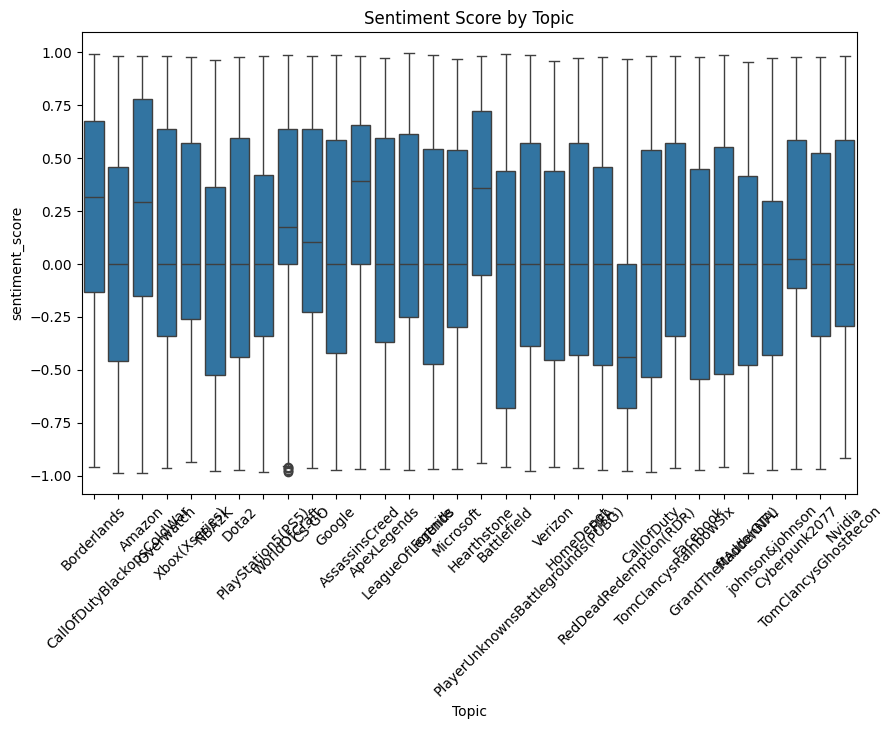

In [25]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='Topic', y='sentiment_score', data=train_data)
plt.xticks(rotation=45)
plt.title('Sentiment Score by Topic')
plt.show()

